In [2]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [3]:
my_graph = nx.Graph([(1,2), (2,3), (3,1)])
my_graph.add_node(4)
my_graph.add_nodes_from([5,6])
my_graph.add_edge(5,6)
print("graph: ", my_graph)
print("nodes: ", my_graph.nodes)
print("edges: ", my_graph.edges)

graph:  Graph with 6 nodes and 4 edges
nodes:  [1, 2, 3, 4, 5, 6]
edges:  [(1, 2), (1, 3), (2, 3), (5, 6)]


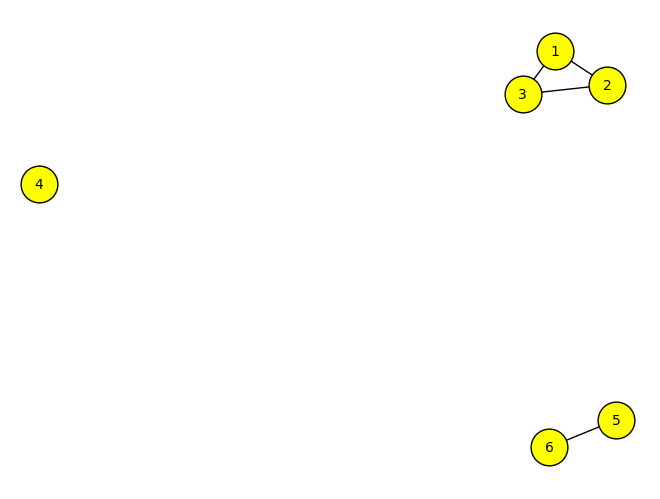

In [4]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

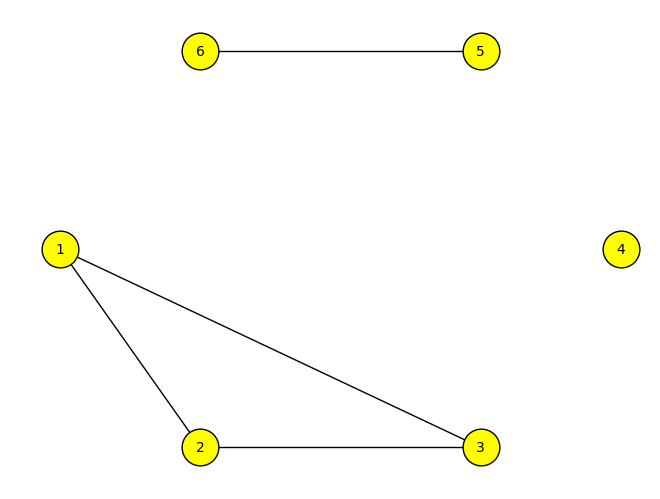

In [111]:
nx.draw_shell(my_graph, **draw_options)

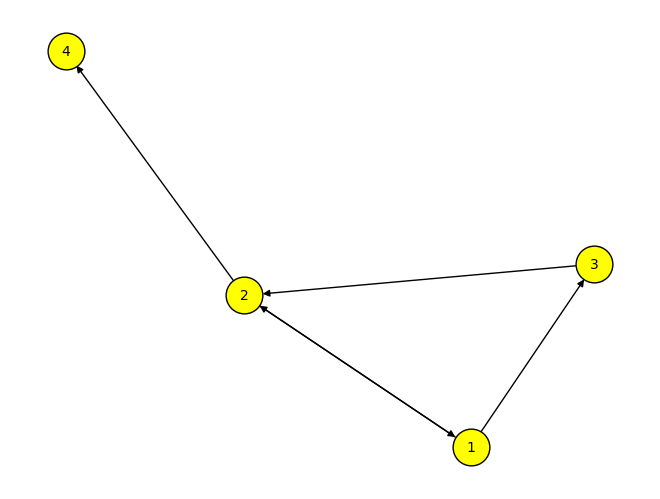

In [119]:
my_digraph = nx.DiGraph()
my_digraph.add_edges_from([(2, 1), (1, 3), (2, 4), (1, 2), (3, 2)])
nx.draw(my_digraph,  **draw_options)


In [120]:
# Neighbors and degrees:

print(list(my_digraph.neighbors(1))) 
print(my_digraph.out_degree[1])  # the number of edges exiting 1
print(my_digraph.in_degree[1])   # the number of edges entering 1
print(my_digraph.degree[1])      # the number of edges incident to 1

[3, 2]
2
1
3


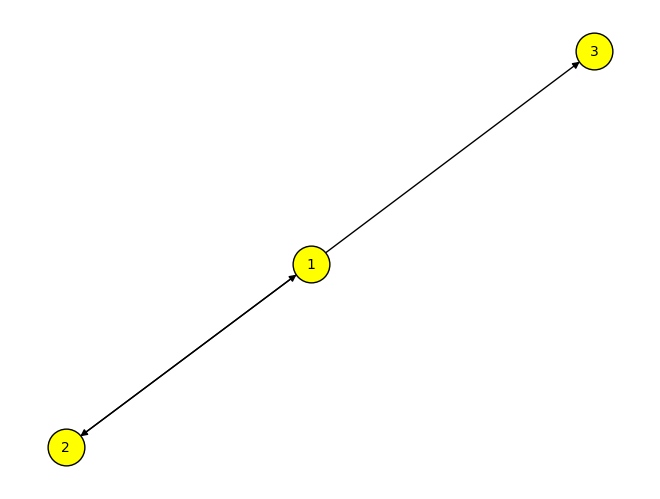

In [121]:

my_digraph.remove_node(4)
my_digraph.remove_edge(3, 2)
nx.draw(my_digraph, **draw_options)

### Draw a weighted graph

In [131]:
def draw_weighted_graph(G, **draw_options):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, **draw_options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={edge: G.get_edge_data(*edge)['weight'] for edge in G.edges})
                                #  nx.get_edge_attributes(G,'weight'))

def draw_weighted_graph_shell(G, **draw_options):
    pos = nx.shell_layout(G)
    nx.draw(G, pos, **draw_options)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))

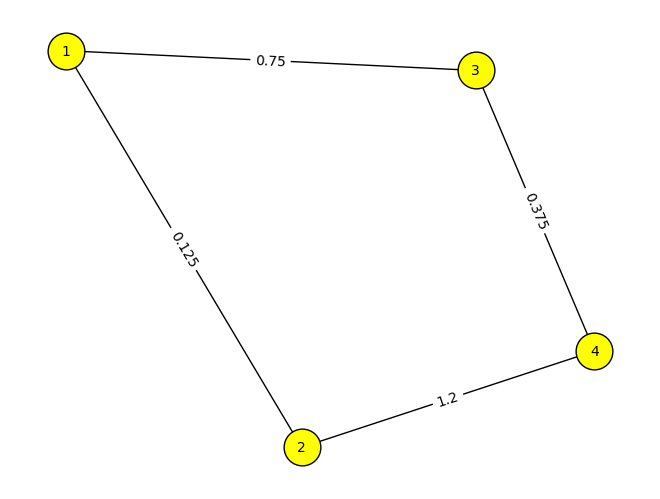

In [133]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
draw_weighted_graph(FG, **draw_options)

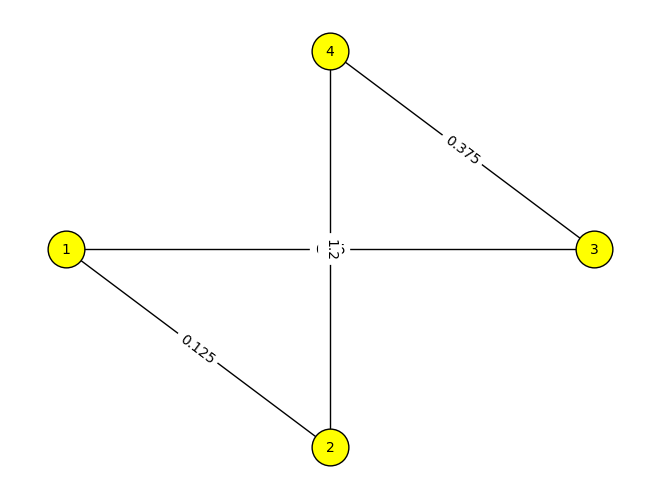

In [134]:
draw_weighted_graph_shell(FG, **draw_options)

## Generate random graph

G graph:
node1 = 0, node2 = 3 , weight = 33
node1 = 0, node2 = 4 , weight = 80
node1 = 0, node2 = 5 , weight = 80
node1 = 0, node2 = 6 , weight = 84
node1 = 0, node2 = 7 , weight = 53
node1 = 0, node2 = 9 , weight = 67
node1 = 1, node2 = 2 , weight = 95
node1 = 1, node2 = 3 , weight = 50
node1 = 1, node2 = 5 , weight = 92
node1 = 1, node2 = 6 , weight = 78
node1 = 1, node2 = 7 , weight = 9
node1 = 1, node2 = 9 , weight = 78
node1 = 2, node2 = 3 , weight = 74
node1 = 2, node2 = 4 , weight = 47
node1 = 2, node2 = 6 , weight = 56
node1 = 2, node2 = 7 , weight = 81
node1 = 2, node2 = 9 , weight = 91
node1 = 3, node2 = 4 , weight = 28
node1 = 3, node2 = 5 , weight = 36
node1 = 3, node2 = 7 , weight = 66
node1 = 3, node2 = 8 , weight = 61
node1 = 3, node2 = 9 , weight = 42
node1 = 4, node2 = 6 , weight = 59
node1 = 4, node2 = 7 , weight = 1
node1 = 4, node2 = 8 , weight = 25
node1 = 4, node2 = 9 , weight = 15
node1 = 5, node2 = 6 , weight = 41
node1 = 5, node2 = 7 , weight = 76
node1 = 5, no

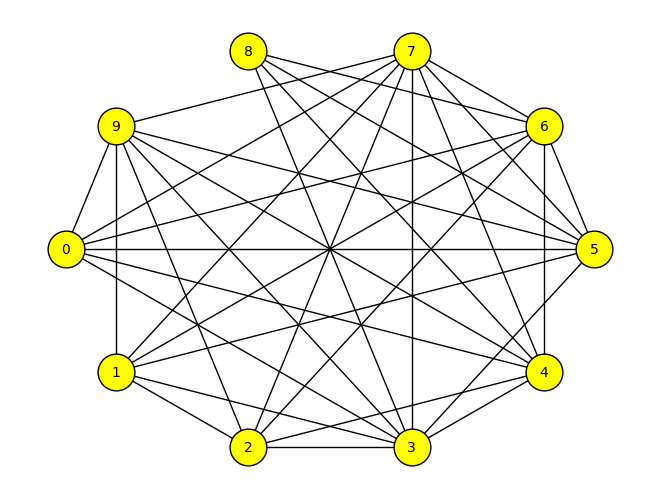

In [135]:
def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr}')

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.randint(1,100)
    return G

my_digraph = random_weighted_graph(10,0.7)
print("G graph:"); print_graph(my_digraph)
nx.draw_shell(my_digraph,  **draw_options)



H graph:
node1 = 1, node2 = 4 , weight = 94
node1 = 1, node2 = 6 , weight = 69
node1 = 1, node2 = 8 , weight = 7
node1 = 2, node2 = 5 , weight = 33
node1 = 3, node2 = 8 , weight = 14
node1 = 4, node2 = 6 , weight = 36
node1 = 5, node2 = 9 , weight = 51
node1 = 7, node2 = 9 , weight = 59
node1 = 8, node2 = 9 , weight = 84


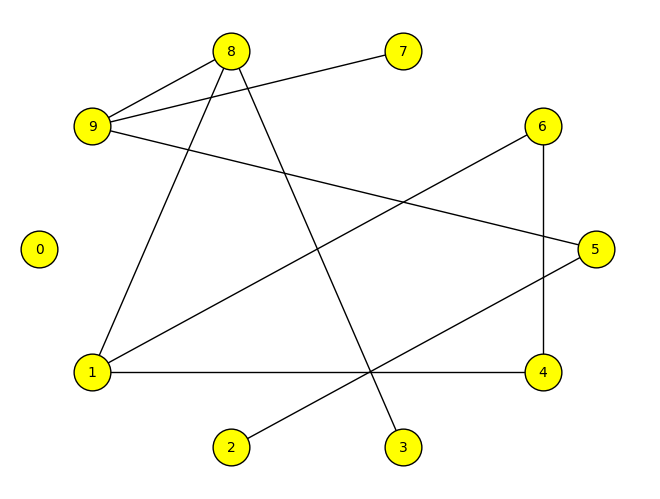

In [136]:
H = random_weighted_graph(10, 0.3)  # create graph with 10 nodes; probability of each edge is 0.3
print("\nH graph:")
print_graph(H)
nx.draw_shell(H,  **draw_options)

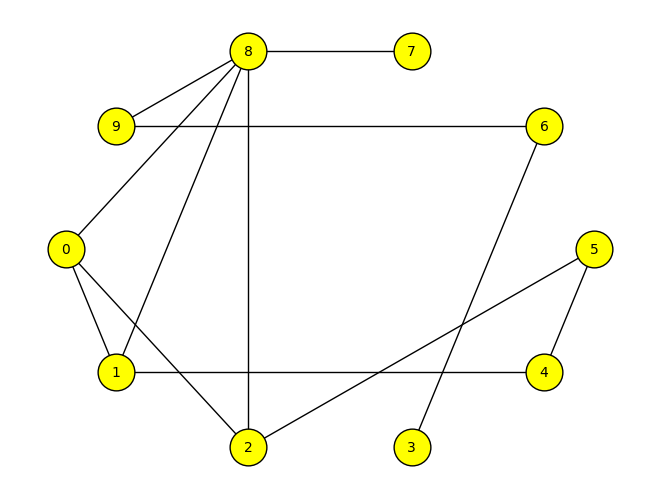

In [137]:
GC = nx.complement(my_digraph)  # every non-edge becomes an edge and vice-versa
nx.draw_shell(GC,  **draw_options)

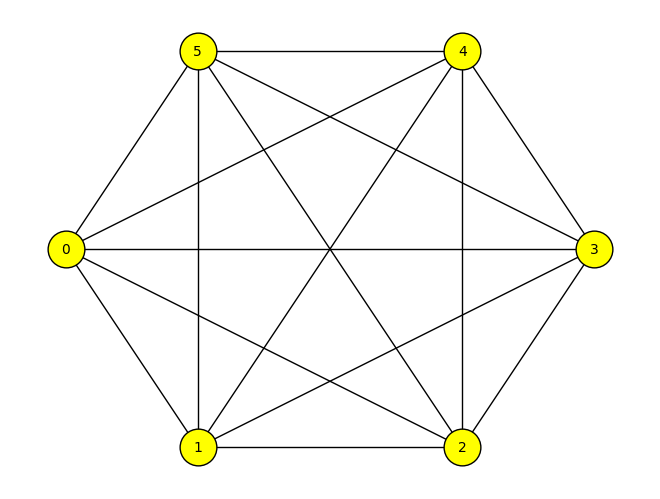

In [74]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw_shell(K_6,  **draw_options)

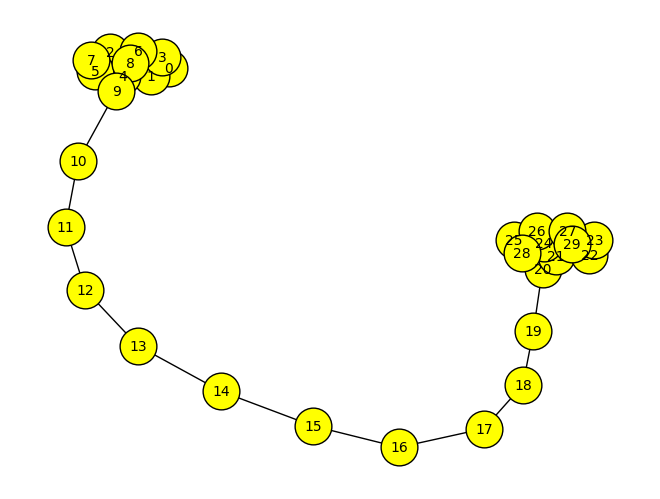

In [138]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

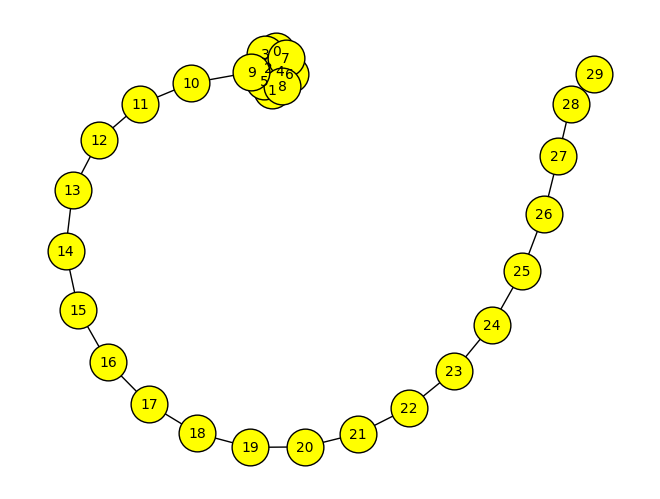

In [139]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

## Graph algorithms

~~~shortest path~~~
[0, 6, 1]


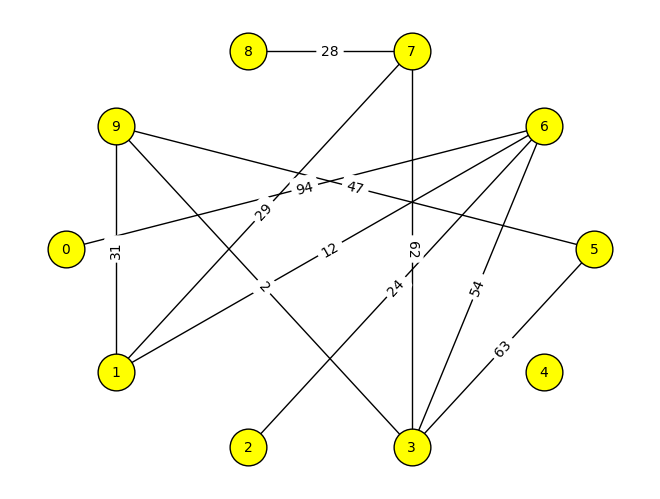

In [140]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
my_digraph = random_weighted_graph(10,0.3)
draw_weighted_graph_shell(my_digraph, **draw_options)
print('~~~shortest path~~~')
if nx.has_path(my_digraph, 0, 1):
    print(nx.shortest_path(my_digraph, 0, 1)) 
else:
    print("No path!")

In [142]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
# Dijkstra:
print(nx.dijkstra_path(my_digraph, 0, 1))  # returns a single path (a list)
print(nx.dijkstra_predecessor_and_distance(my_digraph, 0)) # returns a dict mapping each node to the previous node in shortest path from 0

# Floyd Warshall
print(nx.floyd_warshall_numpy(my_digraph)) # returns a numpy array containing all pairwise distances



~~~weighted graph~~~
[0, 6, 1]
({0: [], 6: [0], 1: [6], 2: [6], 3: [9], 7: [1], 9: [1], 8: [7], 5: [9]}, {0: 0, 6: 94, 1: 106, 2: 118, 7: 135, 9: 137, 3: 139, 8: 163, 5: 184})
[[  0. 106. 118. 139.  inf 184.  94. 135. 163. 137.]
 [106.   0.  36.  33.  inf  78.  12.  29.  57.  31.]
 [118.  36.   0.  69.  inf 114.  24.  65.  93.  67.]
 [139.  33.  69.   0.  inf  49.  45.  62.  90.   2.]
 [ inf  inf  inf  inf   0.  inf  inf  inf  inf  inf]
 [184.  78. 114.  49.  inf   0.  90. 107. 135.  47.]
 [ 94.  12.  24.  45.  inf  90.   0.  41.  69.  43.]
 [135.  29.  65.  62.  inf 107.  41.   0.  28.  60.]
 [163.  57.  93.  90.  inf 135.  69.  28.   0.  88.]
 [137.  31.  67.   2.  inf  47.  43.  60.  88.   0.]]


[(1, 7), (7, 3), (3, 5), (5, 9), (9, 1)]


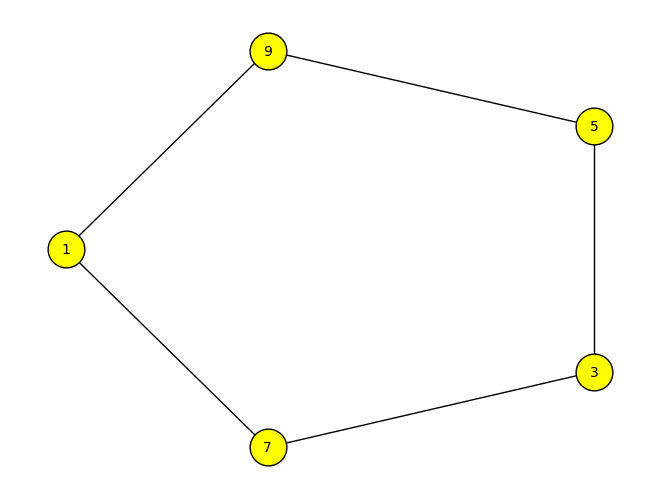

In [143]:
cycle = nx.find_cycle(my_digraph)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

{(9, 1), (7, 8), (3, 5), (6, 0)}


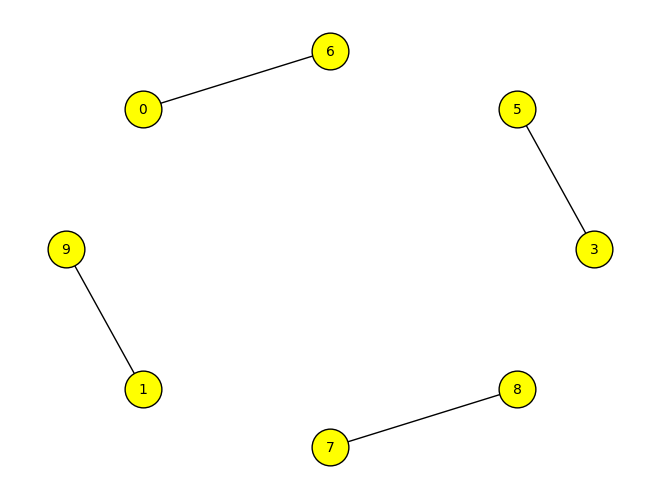

In [144]:
max_weight_matching = nx.max_weight_matching(my_digraph)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Bipartite graphs

There is no "bipartite graph" class in networkx; there are functions that treat a standard networkx.Graph as a bipartite graph.

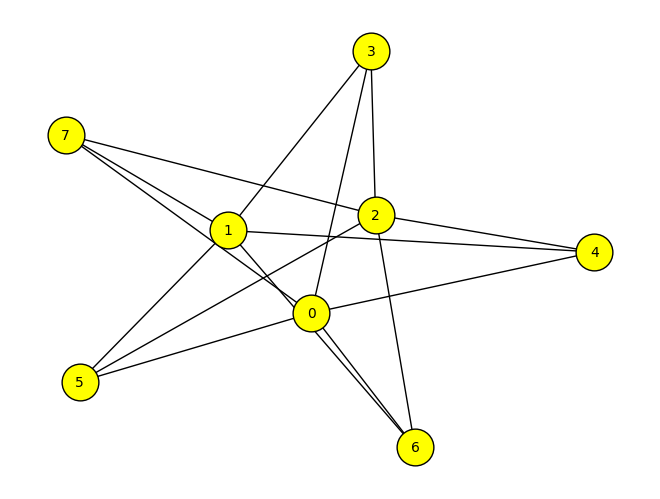

In [153]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
nx.draw(K_3_5,  **draw_options)

left_nodes {0, 1, 2} right_nodes {3, 4, 5, 6, 7}


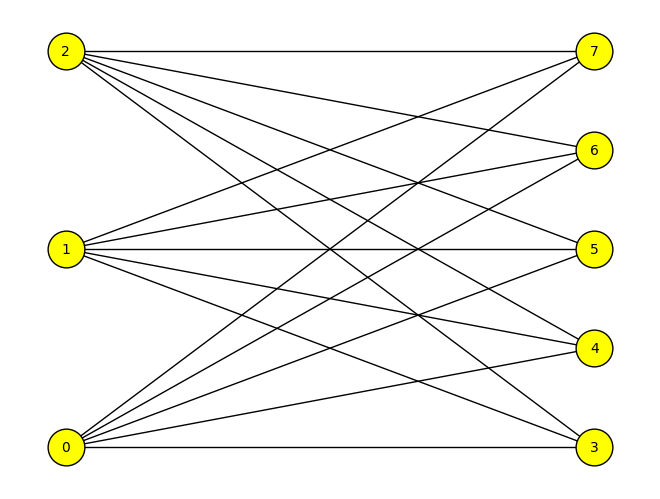

In [154]:
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
print("left_nodes",left_nodes,"right_nodes",right_nodes)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

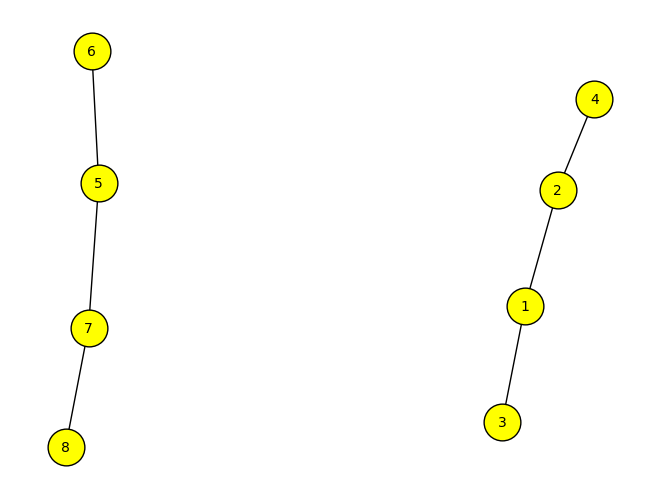

In [5]:
my_digraph = nx.Graph([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
nx.draw(my_digraph,  **draw_options)

In [6]:

left_nodes, right_nodes = nx.bipartite.sets(my_digraph) # Error: AmbiguousSolution
nx.draw(my_digraph,  **draw_options, pos=nx.bipartite_layout(my_digraph, left_nodes))  

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

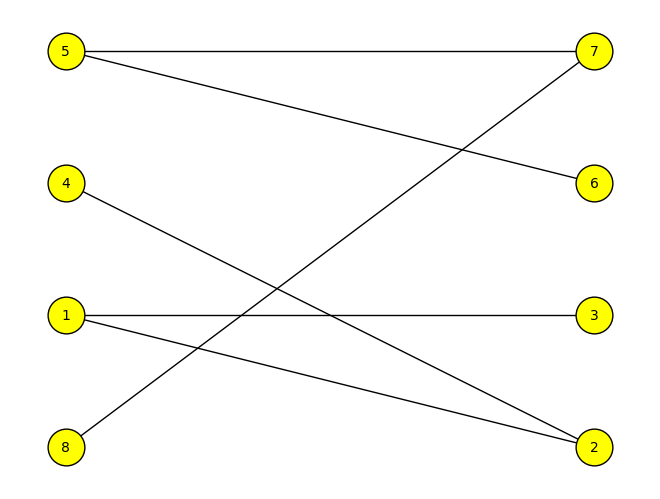

In [157]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(my_digraph,  **draw_options, pos=nx.bipartite_layout(my_digraph, left_nodes))

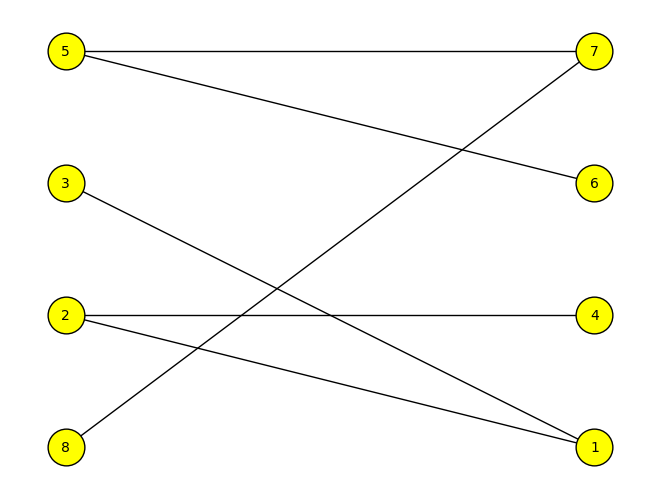

In [158]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(my_digraph,  **draw_options, pos=nx.bipartite_layout(my_digraph, left_nodes))

{0: 3, 1: 4, 2: 5, 3: 0, 4: 1, 5: 2}


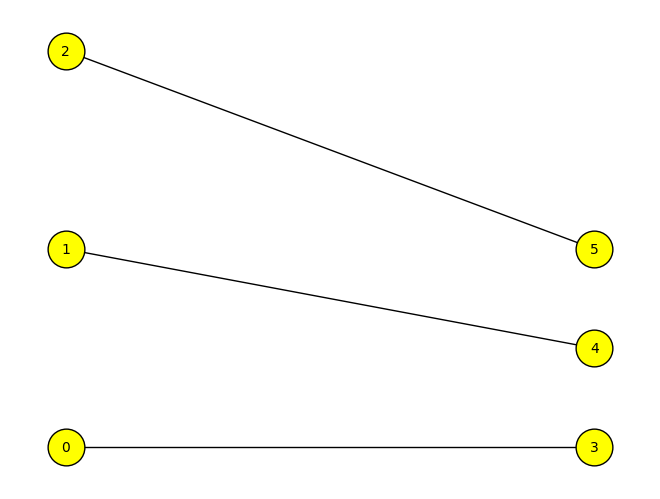

In [161]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [162]:
max_matching = nx.bipartite.maximum_matching(my_digraph) # Error: AmbiguousSolution

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

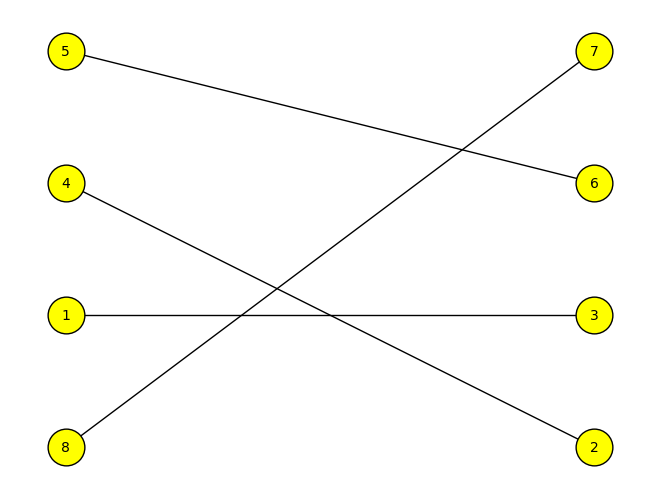

In [163]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(my_digraph, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(my_digraph,left_nodes))

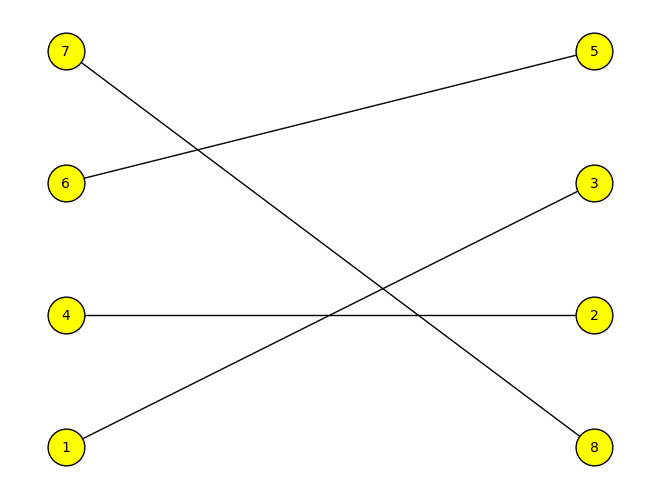

In [164]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(my_digraph, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(my_digraph,left_nodes))

### Bipartite graph with weights

In [165]:
for e in my_digraph.edges:
	weight = np.random.randint(1,100)
	print(e, weight)
	my_digraph[e[0]][e[1]]["weight"]=my_digraph[e[1]][e[0]]["weight"]=weight

(1, 2) 46
(1, 3) 96
(2, 4) 45
(5, 6) 96
(5, 7) 45
(7, 8) 66


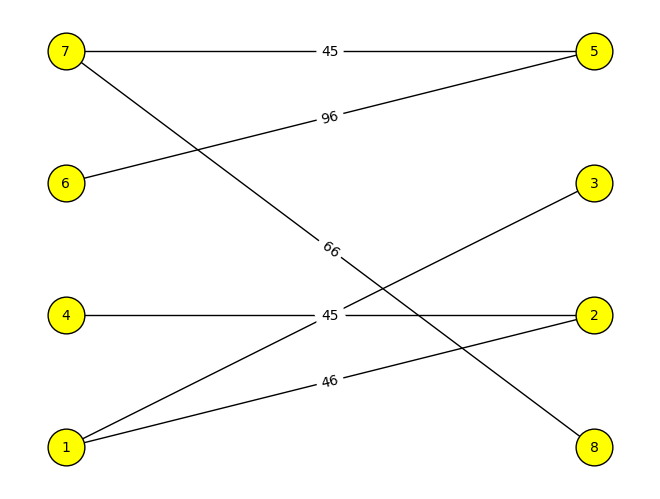

In [166]:
left_nodes = [1,4,6,7]
pos = nx.bipartite_layout(my_digraph, left_nodes)
nx.draw(my_digraph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(my_digraph, pos, edge_labels=nx.get_edge_attributes(my_digraph,'weight'));

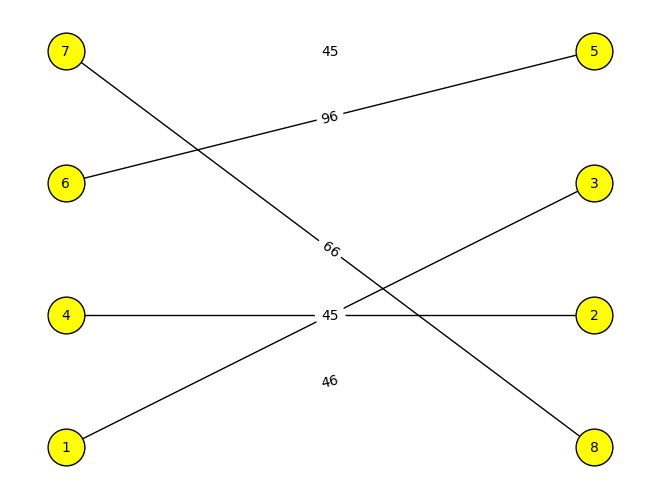

In [167]:
max_weight_matching = nx.max_weight_matching(my_digraph) 
max_weight_matching_graph = nx.Graph(max_weight_matching)
nx.draw(max_weight_matching_graph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(max_weight_matching_graph, pos, edge_labels=nx.get_edge_attributes(my_digraph,'weight'));